In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Importing the dataset. There are two files present in the UCI library, one is hourly data per day and another is daily data. For our purpose, we will use the daily data to predict the daily count for bikes. The datasets are faily clean and pre processed so we will perform EDA, some feature engineering if required and then model fit.

In [31]:
dataset_daily = pd.read_csv('../TensorFlow_Keras/Bike Sharing Regression/day.csv')
dataset_hour = pd.read_csv('../TensorFlow_Keras/Bike Sharing Regression/hour.csv')

### Data Summary

Looking at details for both datasets. The daily dataset is an aggregation of the hourly dataset. with total of 731 entries.

In [13]:
dataset_daily.shape

(731, 16)

In [32]:
dataset_daily.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [12]:
dataset_hour.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [14]:
dataset_hour.shape

(17379, 17)

In [15]:
dataset_daily.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [50]:
dataset_daily_eda = dataset_daily.copy()

Converting the datatype for the variables - 
yr, mnt, holiday, weekday,working day, weathersit,season

In [51]:
object_type =['season','yr','mnth','holiday','weekday','workingday','weathersit']
dataset_daily_eda[object_type] = dataset_daily_eda[object_type].astype('O')

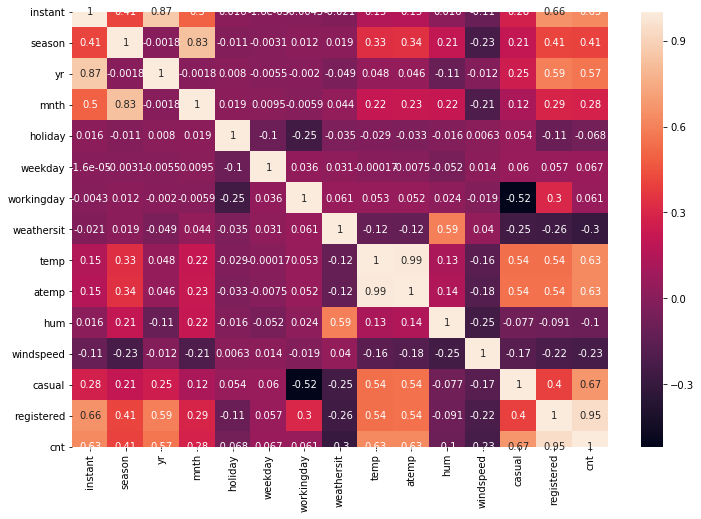

In [109]:
corr = dataset_daily.corr()
plt.figure(figsize=(12,8))
ax = sns.heatmap(corr,annot = True)
plt.show()

In [100]:
corr.transpose()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


### Exploratory Data Analysis

Starting with Univariate analysis with the target variable

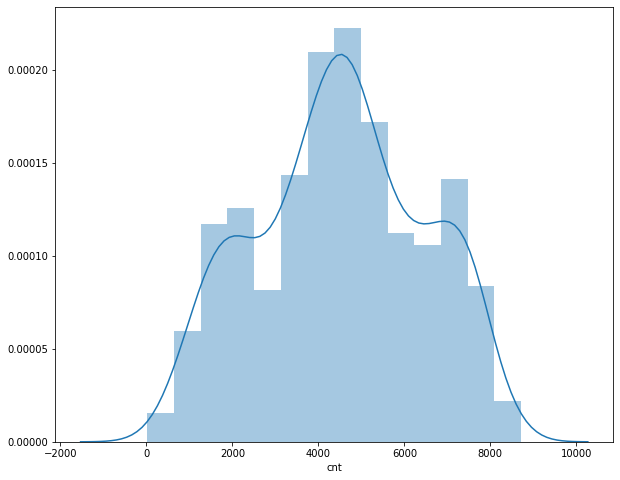

In [112]:
plt.figure(figsize = (10,8))
sns.distplot(dataset_daily_eda['cnt'])

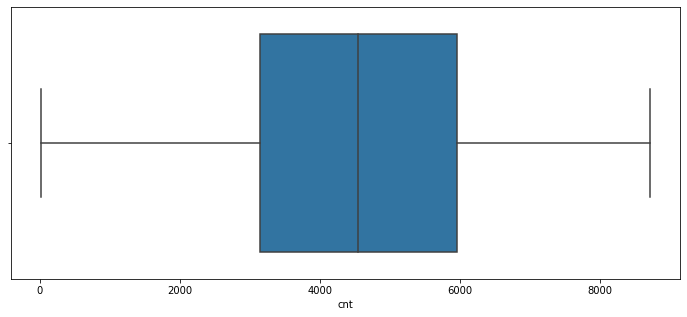

In [116]:
plt.figure(figsize=(12,5))
sns.boxplot(dataset_daily_eda['cnt'])

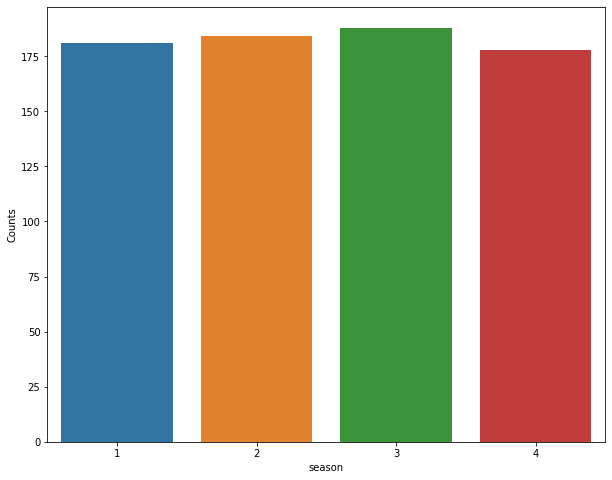

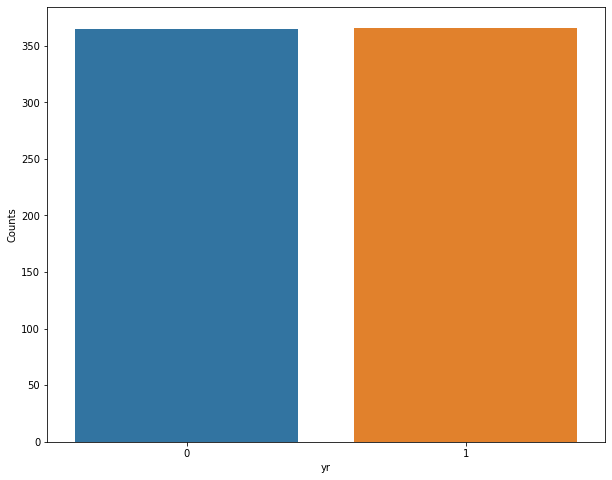

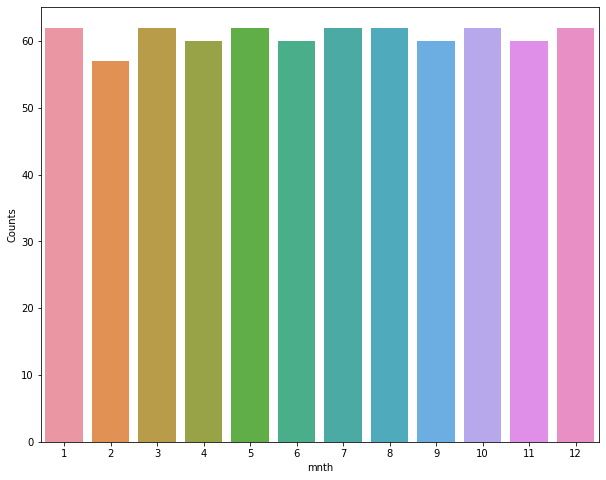

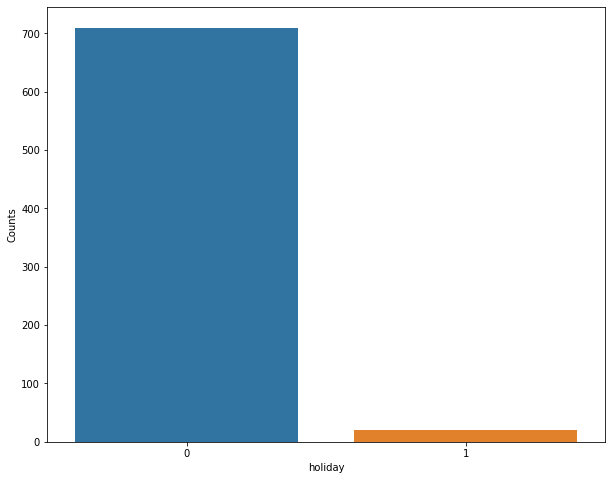

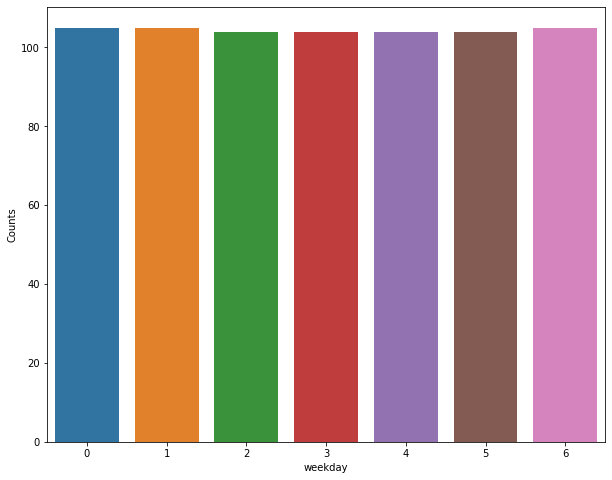

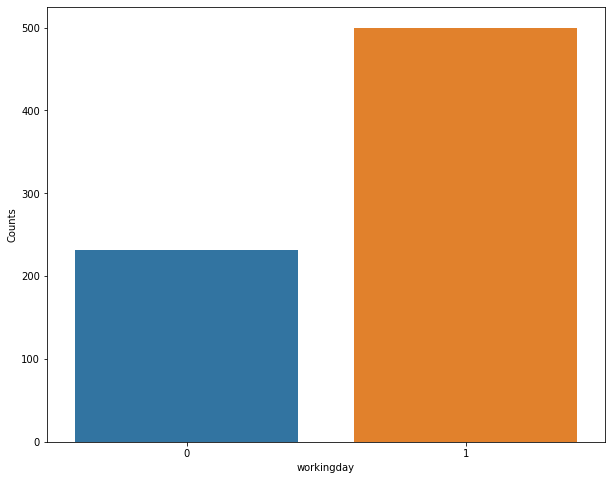

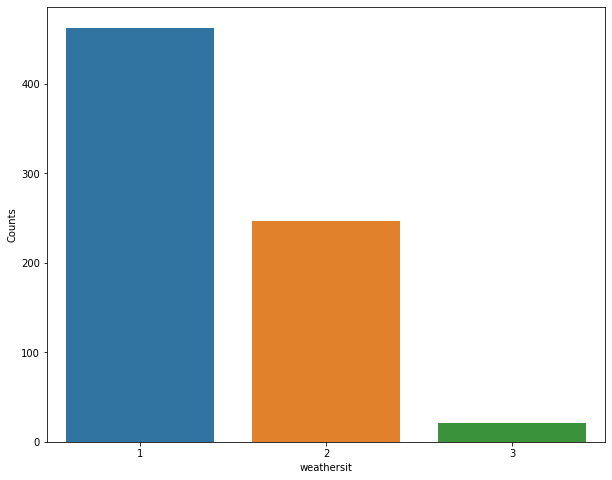

In [37]:
for col in object_type:
    plt.figure(figsize = (10,8))
    sns.countplot(col,data = dataset_daily_eda)
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.show()

Numerical feature plots

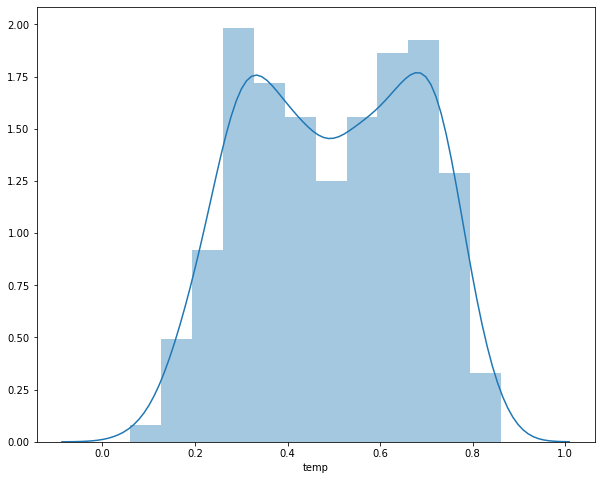

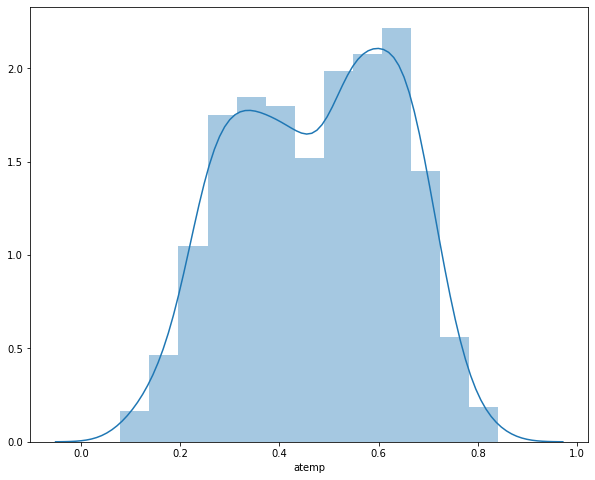

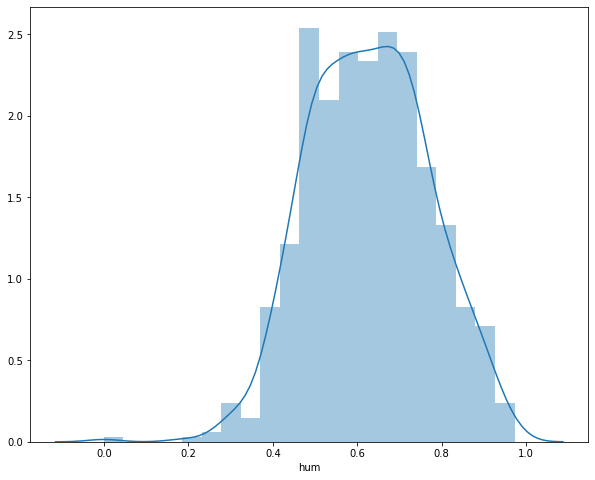

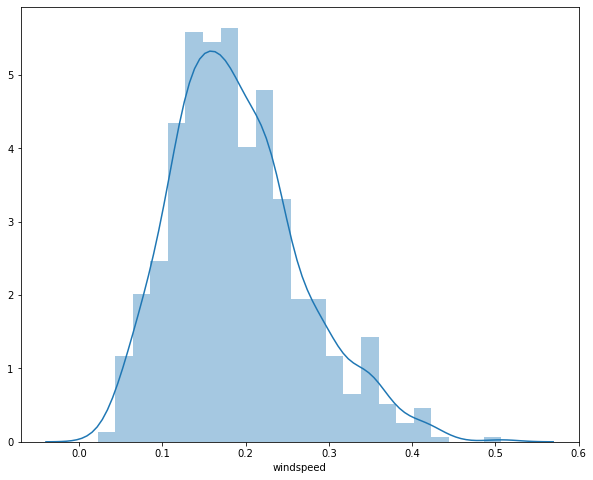

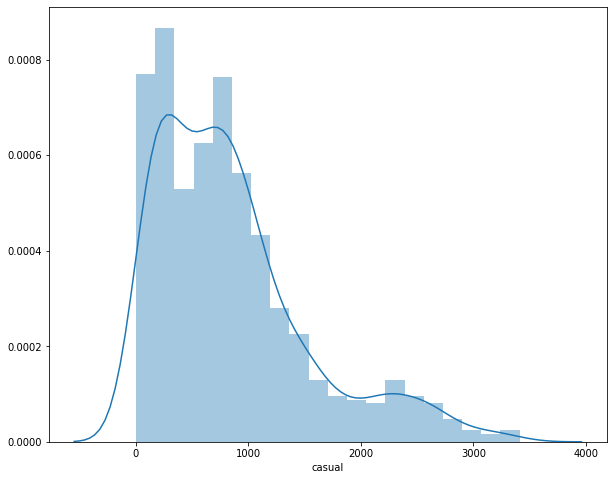

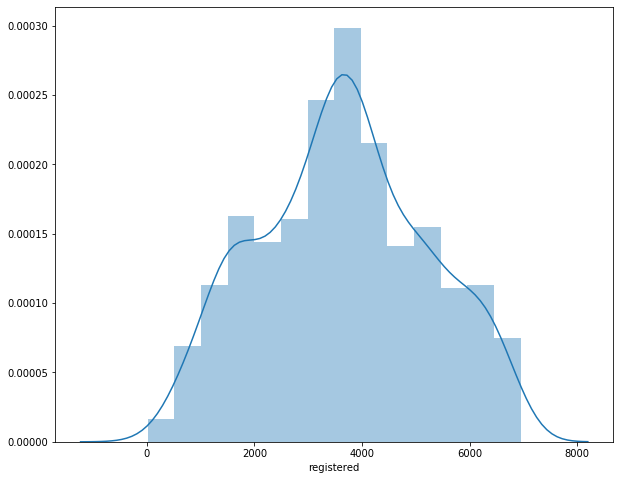

In [38]:
integer_cols = ['temp','atemp','hum','windspeed','casual', 'registered']
for col in integer_cols:
    plt.figure(figsize = (10,8))
    sns.distplot(dataset_daily_eda[col])
    plt.xlabel(col)
    plt.show()

## Bi-Variate EDA

We will start with analysing individual variables with the target to identify if there are any relationships
Starting with Categorical columns

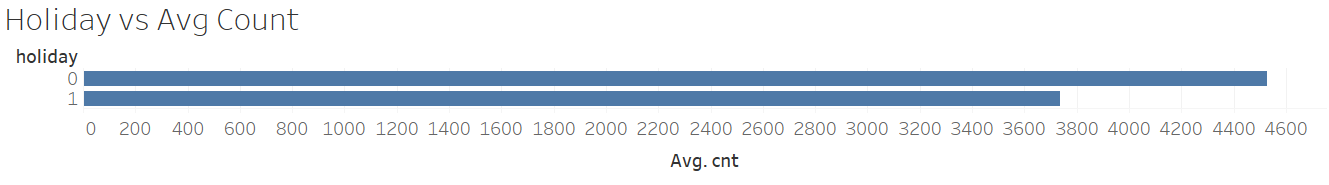

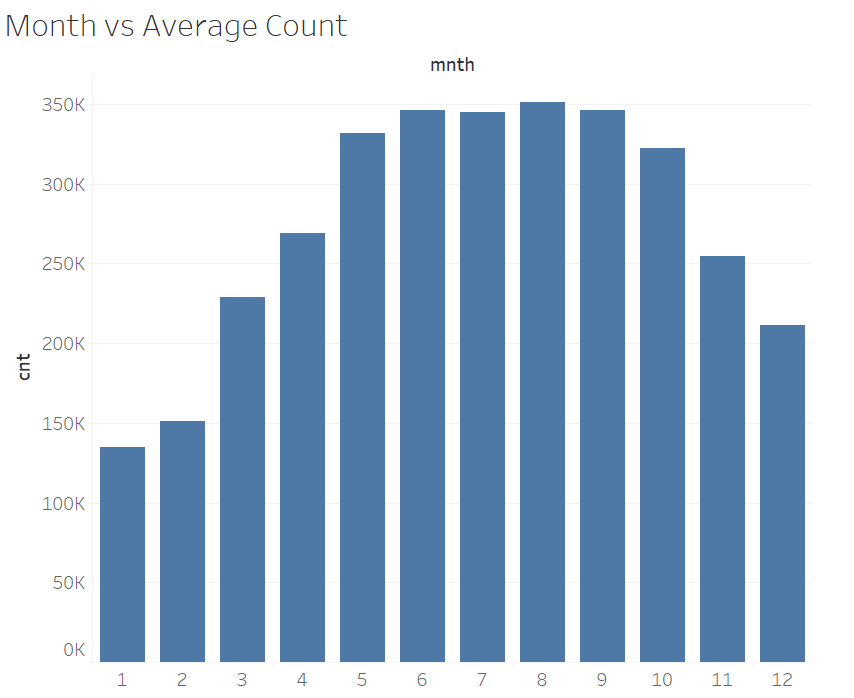

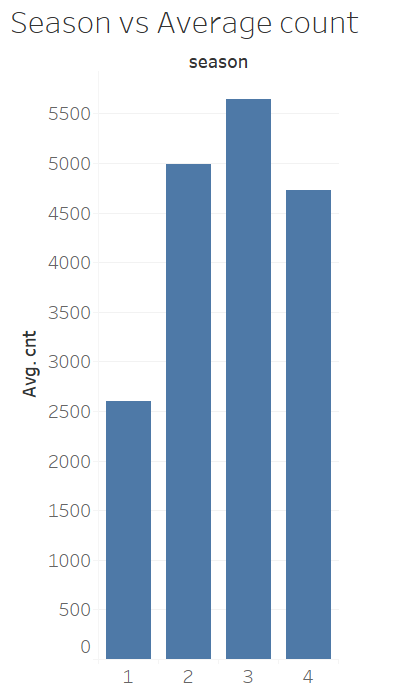

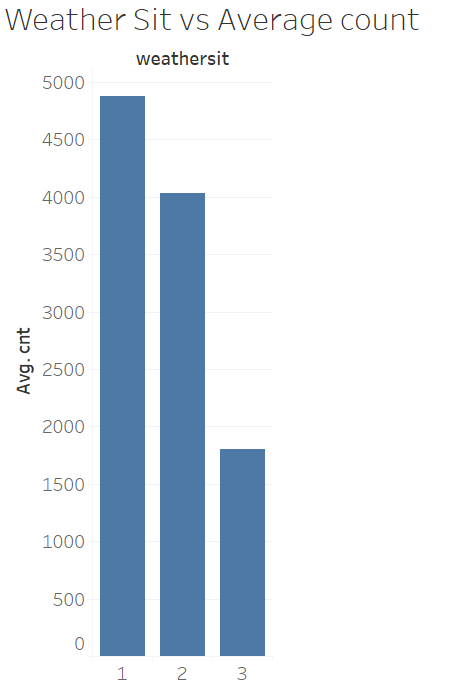

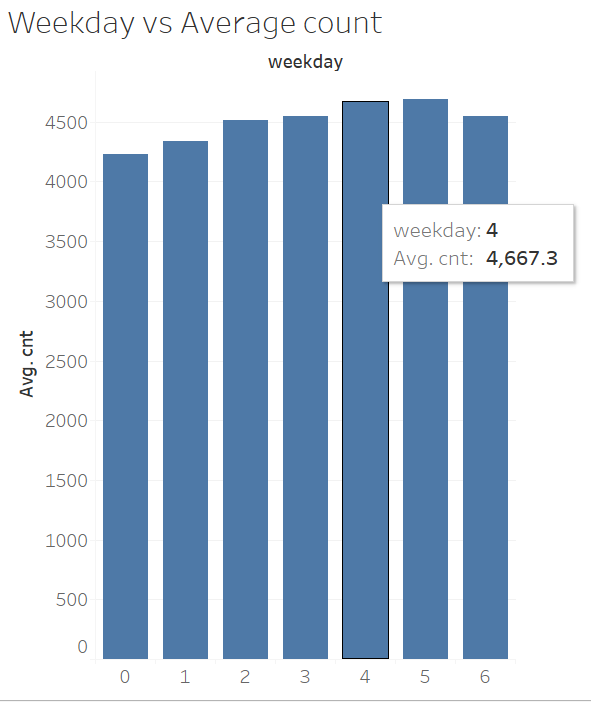

### With Numeric columns

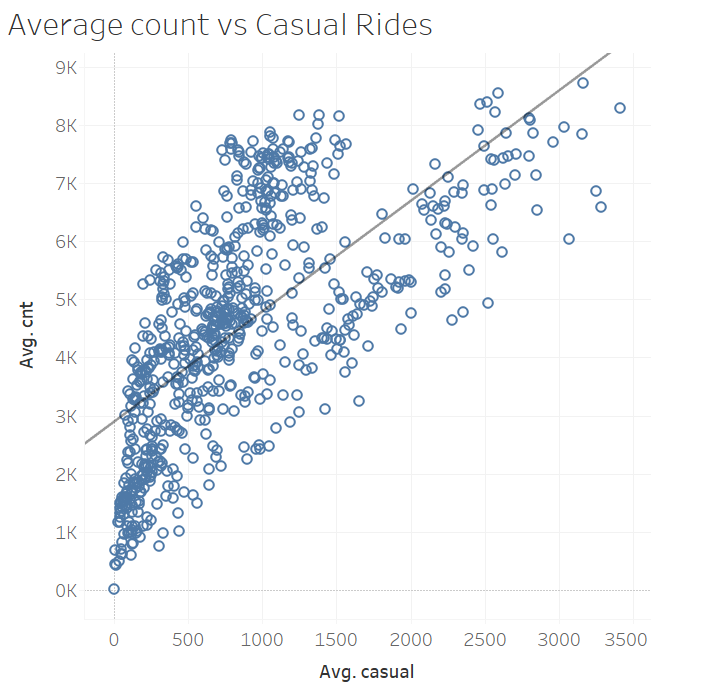

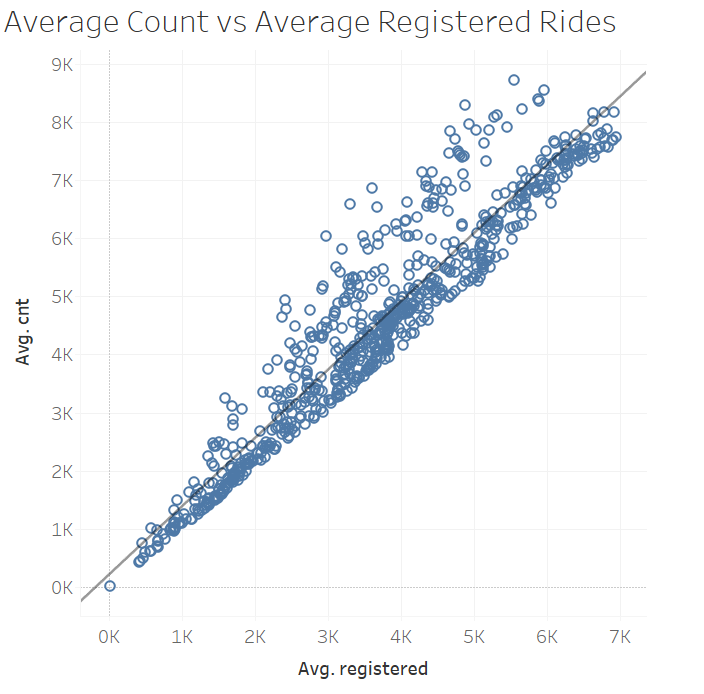

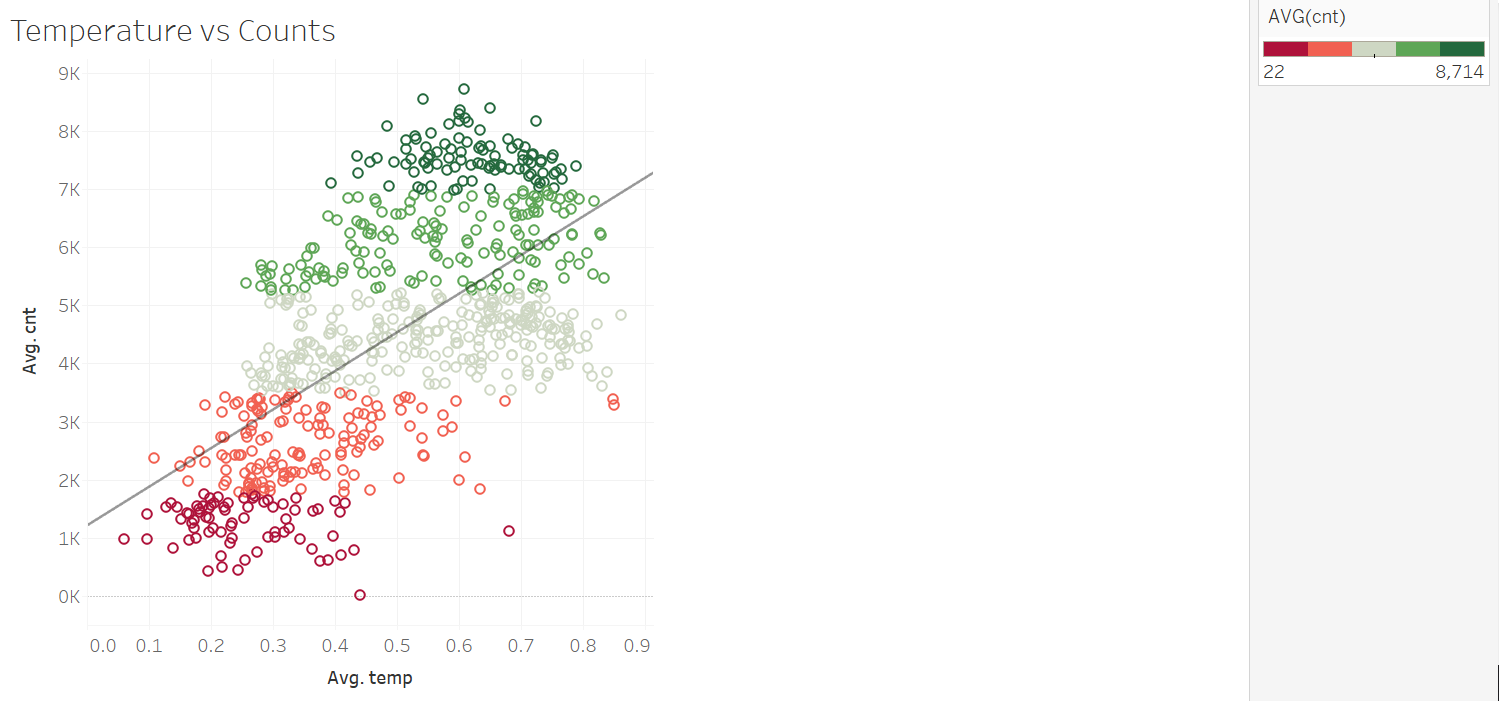

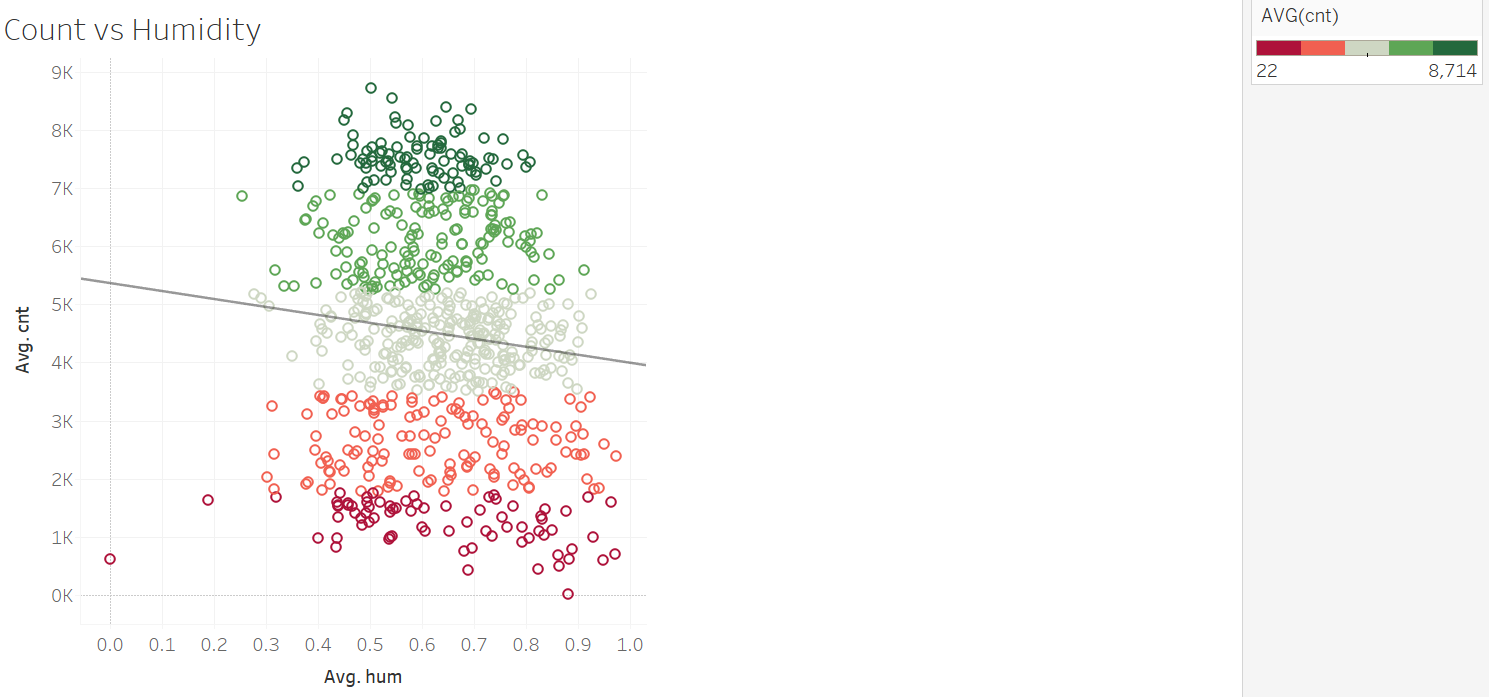

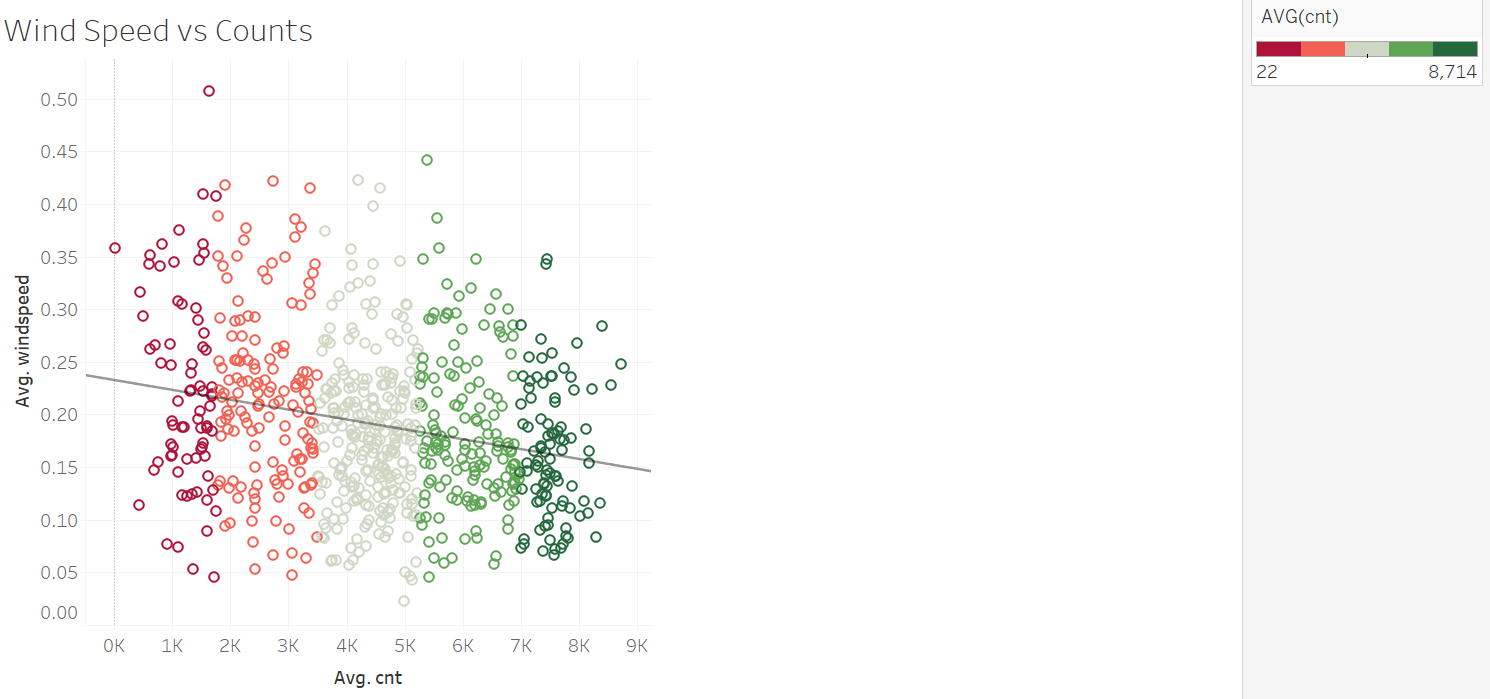

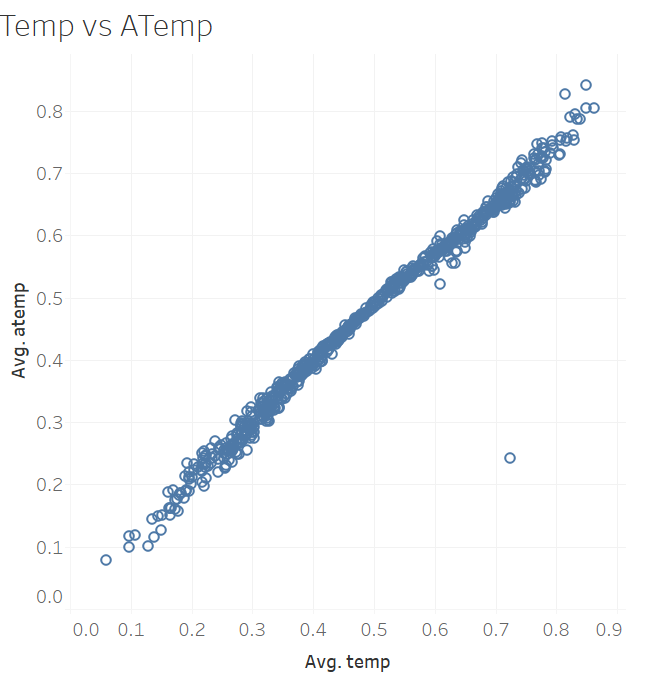

## Removing Features

In [54]:
dataset_daily_eda.drop(['dteday','instant','atemp','yr','registered'],axis = 1,inplace = True)

In [168]:
dataset_daily_eda.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temp,731.0,0.495385,0.183051,0.059130,0.337083,0.498333,0.655417,0.861667
hum,731.0,0.627894,0.142429,0.000000,0.520000,0.626667,0.730209,0.972500
windspeed,731.0,0.190486,0.077498,0.022392,0.134950,0.180975,0.233214,0.507463
casual,731.0,848.176471,686.622488,2.000000,315.500000,713.000000,1096.000000,3410.000000
cnt,731.0,4504.348837,1937.211452,22.000000,3152.000000,4548.000000,5956.000000,8714.000000


In [55]:
dataset_daily_eda.sort_values('cnt',ascending = False)

,season,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,cnt
623,3,9,0,6,0,1,0.608333,0.501667,0.247521,3160,8714
637,4,9,0,6,0,1,0.542500,0.542917,0.227604,2589,8555
630,3,9,0,6,0,1,0.650000,0.646667,0.283583,2512,8395
447,2,3,0,5,1,2,0.601667,0.694167,0.116300,2469,8362
504,2,5,0,6,0,1,0.600000,0.456250,0.083975,3410,8294
...,...,...,...,...,...,...,...,...,...,...,...
64,1,3,0,0,0,2,0.376522,0.948261,0.343287,114,605
25,1,1,0,3,1,3,0.217500,0.862500,0.293850,34,506
725,1,12,0,3,1,3,0.243333,0.823333,0.316546,9,441
26,1,1,0,4,1,1,0.195000,0.687500,0.113837,15,431


This is the final dataset we will be working with.

### Train Test Split

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

In [125]:
X = dataset_daily_eda.drop(['cnt'],axis = 1)
y = dataset_daily_eda['cnt']

In [154]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=32)

In [155]:
X_train = pd.get_dummies(X_train)

In [156]:
X_test = pd.get_dummies(X_test)

In [157]:
train_cols = X_train.columns
test_cols = X_test.columns

missing_columns_train = set(test_cols) - set(train_cols)
missing_columns_test = set(train_cols) - set(test_cols)

for i in missing_columns_train:
    X_train[i] = 0

for j in missing_columns_test:
    X_test[j] = 0

In [158]:
print(X_train.shape)
print(X_test.shape)

(584, 34)
(147, 34)


In [159]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [160]:
## Scaling values
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [161]:
X_test = scaler.transform(X_test)

In [162]:
## Importing libraries for building our network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [266]:
model = Sequential()

model.add(Dense(34,activation = 'relu'))
model.add(Dense(34,activation = 'relu'))
model.add(Dense(34,activation = 'relu'))
model.add(Dense(10,activation = 'relu'))

model.add(Dense(1))

In [267]:
model.compile(optimizer = 'adam',loss = 'mse')

In [268]:
model.fit(X_train,y_train,validation_data = (X_test,y_test),batch_size = 64,epochs = 1000)

Train on 584 samples, validate on 147 samples
Epoch 1/1000
584/584 [==============================] - 0s 586us/sample - loss: 24614785.4247 - val_loss: 21733161.2789
Epoch 2/1000
584/584 [==============================] - 0s 39us/sample - loss: 24611560.0548 - val_loss: 21729754.6531
Epoch 3/1000
584/584 [==============================] - 0s 39us/sample - loss: 24607081.7260 - val_loss: 21723861.2789
Epoch 4/1000
584/584 [==============================] - 0s 41us/sample - loss: 24598533.6438 - val_loss: 21712295.6190
Epoch 5/1000
584/584 [==============================] - 0s 39us/sample - loss: 24581579.9726 - val_loss: 21689046.1497
Epoch 6/1000
584/584 [==============================] - 0s 44us/sample - loss: 24547883.7808 - val_loss: 21642758.8435
Epoch 7/1000
584/584 [==============================] - 0s 41us/sample - loss: 24481486.3288 - val_loss: 21553597.6735
Epoch 8/1000
584/584 [==============================] - 0s 43us/sample - loss: 24356137.0137 - val_loss: 21388872.4762
E

Epoch 70/1000
584/584 [==============================] - 0s 38us/sample - loss: 1587349.1199 - val_loss: 1497643.2185
Epoch 71/1000
584/584 [==============================] - 0s 38us/sample - loss: 1575201.9315 - val_loss: 1502492.3172
Epoch 72/1000
584/584 [==============================] - 0s 38us/sample - loss: 1569977.5325 - val_loss: 1523302.6930
Epoch 73/1000
584/584 [==============================] - 0s 38us/sample - loss: 1564113.8699 - val_loss: 1496181.0485
Epoch 74/1000
584/584 [==============================] - 0s 39us/sample - loss: 1553267.7945 - val_loss: 1482581.3231
Epoch 75/1000
584/584 [==============================] - 0s 41us/sample - loss: 1548324.4623 - val_loss: 1479737.1998
Epoch 76/1000
584/584 [==============================] - 0s 38us/sample - loss: 1543815.9555 - val_loss: 1483532.8844
Epoch 77/1000
584/584 [==============================] - 0s 38us/sample - loss: 1535469.9264 - val_loss: 1472412.3163
Epoch 78/1000
584/584 [==============================] -

584/584 [==============================] - 0s 39us/sample - loss: 1213054.3810 - val_loss: 1225926.6688
Epoch 140/1000
584/584 [==============================] - 0s 40us/sample - loss: 1210887.3219 - val_loss: 1209008.0000
Epoch 141/1000
584/584 [==============================] - 0s 39us/sample - loss: 1206286.7971 - val_loss: 1197142.4452
Epoch 142/1000
584/584 [==============================] - 0s 39us/sample - loss: 1199479.8459 - val_loss: 1197601.7853
Epoch 143/1000
584/584 [==============================] - 0s 40us/sample - loss: 1195260.9812 - val_loss: 1195370.8448
Epoch 144/1000
584/584 [==============================] - 0s 38us/sample - loss: 1191108.7992 - val_loss: 1199451.6467
Epoch 145/1000
584/584 [==============================] - 0s 39us/sample - loss: 1186731.7055 - val_loss: 1190377.6173
Epoch 146/1000
584/584 [==============================] - 0s 40us/sample - loss: 1183011.0873 - val_loss: 1170970.3831
Epoch 147/1000
584/584 [==============================] - 0s 38

584/584 [==============================] - 0s 38us/sample - loss: 948258.4058 - val_loss: 978721.6577
Epoch 209/1000
584/584 [==============================] - 0s 38us/sample - loss: 945236.9238 - val_loss: 997097.4681
Epoch 210/1000
584/584 [==============================] - 0s 39us/sample - loss: 944196.6747 - val_loss: 986709.4145
Epoch 211/1000
584/584 [==============================] - 0s 38us/sample - loss: 943617.1387 - val_loss: 974625.0238
Epoch 212/1000
584/584 [==============================] - 0s 36us/sample - loss: 940466.8442 - val_loss: 983597.9911
Epoch 213/1000
584/584 [==============================] - 0s 36us/sample - loss: 934535.3356 - val_loss: 976527.8168
Epoch 214/1000
584/584 [==============================] - 0s 36us/sample - loss: 930944.2611 - val_loss: 977775.0872
Epoch 215/1000
584/584 [==============================] - 0s 37us/sample - loss: 931521.6815 - val_loss: 990664.9923
Epoch 216/1000
584/584 [==============================] - 0s 36us/sample - loss

584/584 [==============================] - 0s 36us/sample - loss: 829822.5420 - val_loss: 855654.5544
Epoch 279/1000
584/584 [==============================] - 0s 39us/sample - loss: 834101.4640 - val_loss: 845281.8746
Epoch 280/1000
584/584 [==============================] - 0s 38us/sample - loss: 831297.9906 - val_loss: 831238.6747
Epoch 281/1000
584/584 [==============================] - 0s 36us/sample - loss: 830131.0377 - val_loss: 836781.2912
Epoch 282/1000
584/584 [==============================] - 0s 38us/sample - loss: 830681.1627 - val_loss: 860628.9826
Epoch 283/1000
584/584 [==============================] - 0s 38us/sample - loss: 833219.8322 - val_loss: 845858.4639
Epoch 284/1000
584/584 [==============================] - 0s 38us/sample - loss: 827555.1336 - val_loss: 831073.4026
Epoch 285/1000
584/584 [==============================] - 0s 46us/sample - loss: 837095.5890 - val_loss: 827517.5179
Epoch 286/1000
584/584 [==============================] - 0s 41us/sample - loss

584/584 [==============================] - 0s 48us/sample - loss: 765193.6909 - val_loss: 770391.8197
Epoch 349/1000
584/584 [==============================] - 0s 43us/sample - loss: 780609.4007 - val_loss: 775179.3707
Epoch 350/1000
584/584 [==============================] - 0s 44us/sample - loss: 758215.7637 - val_loss: 793374.9656
Epoch 351/1000
584/584 [==============================] - 0s 44us/sample - loss: 763729.6712 - val_loss: 772864.3070
Epoch 352/1000
584/584 [==============================] - 0s 44us/sample - loss: 763555.1849 - val_loss: 781711.1569
Epoch 353/1000
584/584 [==============================] - 0s 50us/sample - loss: 762569.4966 - val_loss: 772320.8958
Epoch 354/1000
584/584 [==============================] - 0s 44us/sample - loss: 754967.7260 - val_loss: 791757.2789
Epoch 355/1000
584/584 [==============================] - 0s 43us/sample - loss: 756966.6755 - val_loss: 784510.4060
Epoch 356/1000
584/584 [==============================] - 0s 43us/sample - loss

584/584 [==============================] - 0s 36us/sample - loss: 706418.6113 - val_loss: 748642.6815
Epoch 419/1000
584/584 [==============================] - 0s 36us/sample - loss: 700845.6233 - val_loss: 741207.1173
Epoch 420/1000
584/584 [==============================] - 0s 32us/sample - loss: 703389.7072 - val_loss: 743195.4775
Epoch 421/1000
584/584 [==============================] - 0s 34us/sample - loss: 702380.3065 - val_loss: 750719.4515
Epoch 422/1000
584/584 [==============================] - 0s 43us/sample - loss: 701866.1284 - val_loss: 751388.8448
Epoch 423/1000
584/584 [==============================] - 0s 41us/sample - loss: 703107.0497 - val_loss: 742253.2406
Epoch 424/1000
584/584 [==============================] - 0s 38us/sample - loss: 700832.5651 - val_loss: 752939.8920
Epoch 425/1000
584/584 [==============================] - 0s 36us/sample - loss: 703250.7928 - val_loss: 739094.8554
Epoch 426/1000
584/584 [==============================] - 0s 34us/sample - loss

584/584 [==============================] - 0s 47us/sample - loss: 664536.7106 - val_loss: 716747.5340
Epoch 489/1000
584/584 [==============================] - 0s 43us/sample - loss: 667167.9259 - val_loss: 719613.4184
Epoch 490/1000
584/584 [==============================] - 0s 46us/sample - loss: 662864.5428 - val_loss: 731414.4196
Epoch 491/1000
584/584 [==============================] - ETA: 0s - loss: 570200.62 - 0s 46us/sample - loss: 664563.3408 - val_loss: 730221.8376
Epoch 492/1000
584/584 [==============================] - 0s 41us/sample - loss: 667068.4110 - val_loss: 724861.6905
Epoch 493/1000
584/584 [==============================] - 0s 48us/sample - loss: 667443.4144 - val_loss: 746608.1110
Epoch 494/1000
584/584 [==============================] - 0s 46us/sample - loss: 663967.7367 - val_loss: 722735.9630
Epoch 495/1000
584/584 [==============================] - 0s 43us/sample - loss: 664167.9050 - val_loss: 727797.4821
Epoch 496/1000
584/584 [===========================

584/584 [==============================] - 0s 51us/sample - loss: 639420.8981 - val_loss: 713911.6658
Epoch 558/1000
584/584 [==============================] - 0s 53us/sample - loss: 638066.6104 - val_loss: 701669.7785
Epoch 559/1000
584/584 [==============================] - 0s 44us/sample - loss: 639926.0051 - val_loss: 702609.5115
Epoch 560/1000
584/584 [==============================] - 0s 41us/sample - loss: 639081.5574 - val_loss: 694937.8202
Epoch 561/1000
584/584 [==============================] - 0s 41us/sample - loss: 636361.1027 - val_loss: 706969.5655
Epoch 562/1000
584/584 [==============================] - 0s 58us/sample - loss: 639668.6610 - val_loss: 704123.2117
Epoch 563/1000
584/584 [==============================] - 0s 46us/sample - loss: 639254.3485 - val_loss: 704279.7258
Epoch 564/1000
584/584 [==============================] - 0s 43us/sample - loss: 635456.9110 - val_loss: 717584.1390
Epoch 565/1000
584/584 [==============================] - 0s 44us/sample - loss

584/584 [==============================] - 0s 44us/sample - loss: 611632.4024 - val_loss: 680448.2734
Epoch 628/1000
584/584 [==============================] - 0s 43us/sample - loss: 618743.3527 - val_loss: 691062.8682
Epoch 629/1000
584/584 [==============================] - 0s 44us/sample - loss: 613420.3724 - val_loss: 680036.6380
Epoch 630/1000
584/584 [==============================] - 0s 44us/sample - loss: 615181.1053 - val_loss: 686840.0476
Epoch 631/1000
584/584 [==============================] - 0s 46us/sample - loss: 614976.8176 - val_loss: 685837.2334
Epoch 632/1000
584/584 [==============================] - 0s 46us/sample - loss: 613059.4003 - val_loss: 689272.9626
Epoch 633/1000
584/584 [==============================] - 0s 41us/sample - loss: 608771.5753 - val_loss: 692059.5689
Epoch 634/1000
584/584 [==============================] - 0s 44us/sample - loss: 608150.3990 - val_loss: 683735.1682
Epoch 635/1000
584/584 [==============================] - 0s 44us/sample - loss

584/584 [==============================] - 0s 37us/sample - loss: 588945.3673 - val_loss: 688787.5821
Epoch 698/1000
584/584 [==============================] - 0s 34us/sample - loss: 591476.2860 - val_loss: 693214.5548
Epoch 699/1000
584/584 [==============================] - 0s 38us/sample - loss: 592084.1610 - val_loss: 702666.2020
Epoch 700/1000
584/584 [==============================] - 0s 36us/sample - loss: 586503.6708 - val_loss: 684228.2866
Epoch 701/1000
584/584 [==============================] - 0s 38us/sample - loss: 588429.6096 - val_loss: 695104.6811
Epoch 702/1000
584/584 [==============================] - 0s 36us/sample - loss: 591421.8641 - val_loss: 684131.8306
Epoch 703/1000
584/584 [==============================] - 0s 39us/sample - loss: 586802.1045 - val_loss: 680444.5568
Epoch 704/1000
584/584 [==============================] - 0s 55us/sample - loss: 596722.2551 - val_loss: 681715.5763
Epoch 705/1000
584/584 [==============================] - 0s 55us/sample - loss

584/584 [==============================] - 0s 48us/sample - loss: 568010.3596 - val_loss: 680916.8501
Epoch 768/1000
584/584 [==============================] - 0s 46us/sample - loss: 572398.3065 - val_loss: 683304.6788
Epoch 769/1000
584/584 [==============================] - 0s 44us/sample - loss: 567302.7427 - val_loss: 693194.4077
Epoch 770/1000
584/584 [==============================] - 0s 50us/sample - loss: 561979.4041 - val_loss: 690107.7487
Epoch 771/1000
584/584 [==============================] - 0s 51us/sample - loss: 563073.4795 - val_loss: 697454.3544
Epoch 772/1000
584/584 [==============================] - 0s 51us/sample - loss: 563040.5021 - val_loss: 695655.1303
Epoch 773/1000
584/584 [==============================] - 0s 44us/sample - loss: 565279.1490 - val_loss: 692328.1786
Epoch 774/1000
584/584 [==============================] - 0s 70us/sample - loss: 561132.0462 - val_loss: 703309.6522
Epoch 775/1000
584/584 [==============================] - 0s 65us/sample - loss

Epoch 837/1000
584/584 [==============================] - 0s 55us/sample - loss: 535211.1404 - val_loss: 684378.0544
Epoch 838/1000
584/584 [==============================] - 0s 51us/sample - loss: 534153.9354 - val_loss: 689625.0738
Epoch 839/1000
584/584 [==============================] - 0s 60us/sample - loss: 533901.0096 - val_loss: 692364.6792
Epoch 840/1000
584/584 [==============================] - 0s 51us/sample - loss: 536047.3416 - val_loss: 690756.8161
Epoch 841/1000
584/584 [==============================] - 0s 84us/sample - loss: 532927.5411 - val_loss: 687615.9658
Epoch 842/1000
584/584 [==============================] - 0s 109us/sample - loss: 531752.5317 - val_loss: 689030.9035
Epoch 843/1000
584/584 [==============================] - 0s 61us/sample - loss: 534629.0445 - val_loss: 697171.0710
Epoch 844/1000
584/584 [==============================] - 0s 61us/sample - loss: 532193.3955 - val_loss: 680835.4022
Epoch 845/1000
584/584 [==============================] - 0s 55

584/584 [==============================] - 0s 46us/sample - loss: 514123.5240 - val_loss: 686332.6866
Epoch 908/1000
584/584 [==============================] - 0s 50us/sample - loss: 514475.3870 - val_loss: 686684.0009
Epoch 909/1000
584/584 [==============================] - 0s 44us/sample - loss: 511276.5604 - val_loss: 688457.9473
Epoch 910/1000
584/584 [==============================] - 0s 46us/sample - loss: 510142.9110 - val_loss: 678834.7211
Epoch 911/1000
584/584 [==============================] - 0s 46us/sample - loss: 507770.6592 - val_loss: 679605.8108
Epoch 912/1000
584/584 [==============================] - 0s 53us/sample - loss: 507757.5865 - val_loss: 690480.9141
Epoch 913/1000
584/584 [==============================] - 0s 44us/sample - loss: 511430.2038 - val_loss: 691736.8542
Epoch 914/1000
584/584 [==============================] - 0s 43us/sample - loss: 506428.4795 - val_loss: 681544.3663
Epoch 915/1000
584/584 [==============================] - 0s 48us/sample - loss

584/584 [==============================] - 0s 48us/sample - loss: 481497.2877 - val_loss: 704653.1713
Epoch 978/1000
584/584 [==============================] - 0s 41us/sample - loss: 479989.9942 - val_loss: 709455.0825
Epoch 979/1000
584/584 [==============================] - 0s 48us/sample - loss: 482808.0021 - val_loss: 713695.7700
Epoch 980/1000
584/584 [==============================] - 0s 43us/sample - loss: 488145.0274 - val_loss: 714588.5876
Epoch 981/1000
584/584 [==============================] - 0s 44us/sample - loss: 480097.8861 - val_loss: 706400.2253
Epoch 982/1000
584/584 [==============================] - 0s 50us/sample - loss: 483408.7620 - val_loss: 706058.4762
Epoch 983/1000
584/584 [==============================] - 0s 44us/sample - loss: 489074.7457 - val_loss: 709312.5680
Epoch 984/1000
584/584 [==============================] - 0s 39us/sample - loss: 477997.0938 - val_loss: 695796.3391
Epoch 985/1000
584/584 [==============================] - 0s 39us/sample - loss

In [269]:
Loss_data = pd.DataFrame(model.history.history)

<Figure size 864x720 with 0 Axes>

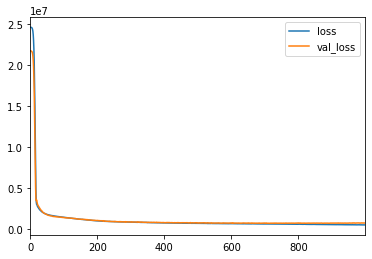

In [270]:
plt.figure(figsize = (12,10))
Loss_data.plot()
plt.show()

In [271]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [272]:
pred = model.predict(X_test)

In [273]:
mean_squared_error(y_test,pred)

703405.9903680786

In [274]:
mean_absolute_error(y_test,pred)

703.3774796051233

In [275]:
explained_variance_score(y_test,pred)

0.8338704988599253

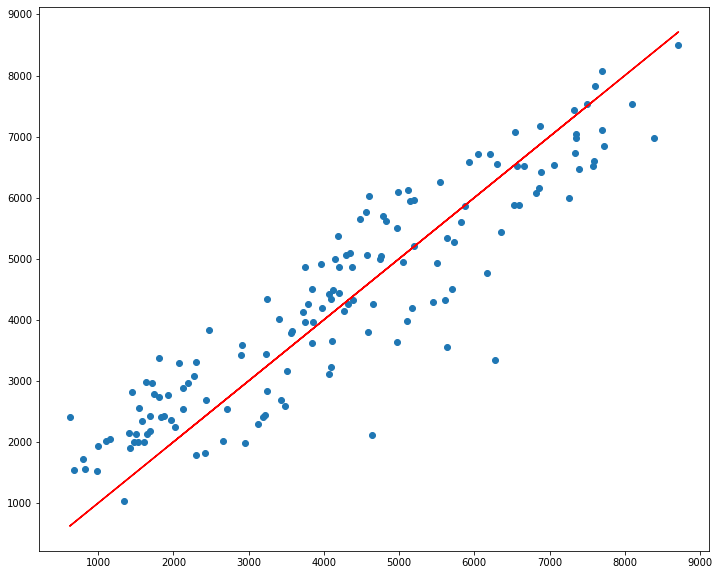

In [276]:
plt.figure(figsize=(12,10))
plt.scatter(y_test,pred)
plt.plot(y_test,y_test,'r')

In [277]:
random_values = pd.DataFrame(dataset_daily_eda.drop(['cnt'],axis=1).iloc[1].transpose())

In [278]:
random_values = random_values.transpose()

In [279]:
random_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 1 to 1
Data columns (total 10 columns):
season        1 non-null object
mnth          1 non-null object
holiday       1 non-null object
weekday       1 non-null object
workingday    1 non-null object
weathersit    1 non-null object
temp          1 non-null object
hum           1 non-null object
windspeed     1 non-null object
casual        1 non-null object
dtypes: object(10)
memory usage: 88.0+ bytes


In [280]:
random_values[['temp','hum','windspeed','casual']] = random_values[['temp','hum','windspeed','casual']].astype('float')

In [281]:
random_values = pd.get_dummies(random_values)

In [282]:
for i in train_cols:
    random_values[i] = 0
for j in test_cols:
    random_values[j]=0

In [283]:
random_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 1 to 1
Data columns (total 34 columns):
temp            1 non-null int64
hum             1 non-null int64
windspeed       1 non-null int64
casual          1 non-null int64
season_1        1 non-null int64
mnth_1          1 non-null int64
holiday_0       1 non-null int64
weekday_0       1 non-null int64
workingday_0    1 non-null int64
weathersit_2    1 non-null int64
season_2        1 non-null int64
season_3        1 non-null int64
season_4        1 non-null int64
mnth_2          1 non-null int64
mnth_3          1 non-null int64
mnth_4          1 non-null int64
mnth_5          1 non-null int64
mnth_6          1 non-null int64
mnth_7          1 non-null int64
mnth_8          1 non-null int64
mnth_9          1 non-null int64
mnth_10         1 non-null int64
mnth_11         1 non-null int64
mnth_12         1 non-null int64
holiday_1       1 non-null int64
weekday_1       1 non-null int64
weekday_2       1 non-null int64
weekday_

In [284]:
random_values = scaler.transform(random_values.values.reshape(-1,34))

In [285]:
prediction = model.predict(random_values)

In [286]:
prediction

array([[0.00383928]], dtype=float32)

In [292]:
plot_model(model, show_shapes=True, show_layer_names=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [290]:
from tensorflow.keras.utils import plot_model